In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

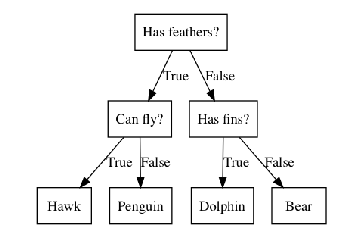

In [2]:
mglearn.plots.plot_animal_tree()

- 決定木では、Yes/Noで答えられる質問で構成された階層的な木構造を学習する
- 上記の図の場合、4つの動物のクラスを3つの特徴量で識別するモデルを作ったことになる

### 決定木の複雑さの制御

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [5]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [6]:
print("accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy on training set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy on training set: 1.000
accuracy on training set: 0.937


- 過剰適合
- つまり、新しいデータに対する汎化精度が低い
- 木が完全に訓練データに適合する前に木の成長を止める

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy on training set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy on training set: 0.988
accuracy on training set: 0.951


- 決定木の複雑さを制御するには、max_depthで質問の列を指定し、木の深さを制御し、過剰適合を防ぐ

### 決定木の解析

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
import graphviz

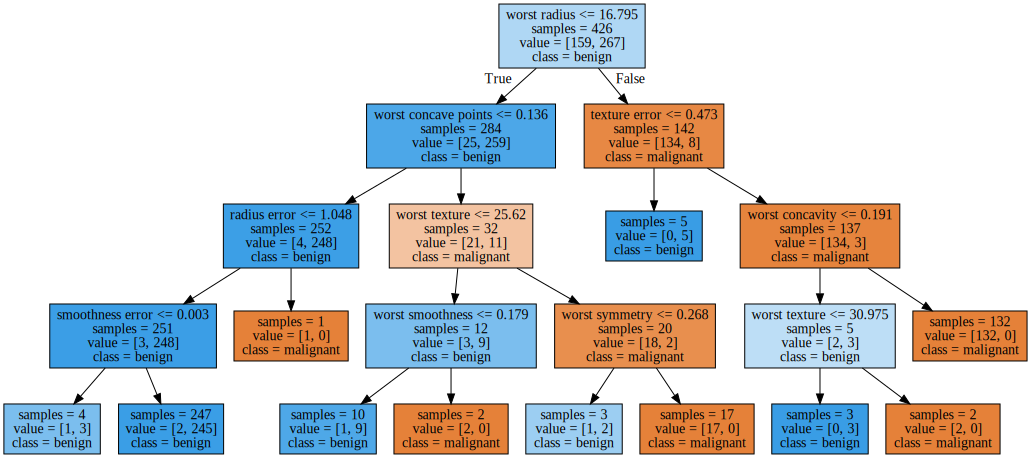

In [10]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 決定木の特徴量の重要性
- 特徴量の重要度
  - 決定木が行う判断によって、個々の特徴量がどの程度重要かを示す割合
  - 0: 全く使われていない
  - 1: 完全にターゲットを予想できる
  - 特徴量の重要度の和は常に1になる

In [12]:
print("Feature importance: \n{}".format(tree.feature_importances_))

Feature importance: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


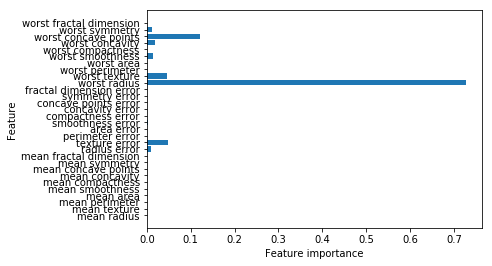

In [14]:
# 特徴量の重要度の可視化
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


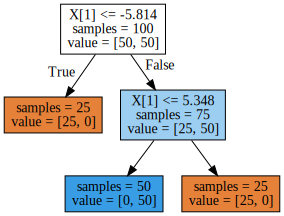

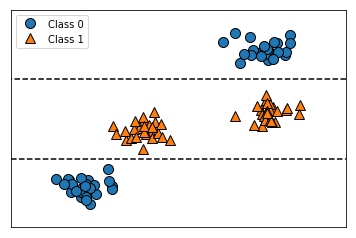

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [16]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0,0.5,'Price in $/Mbyte')

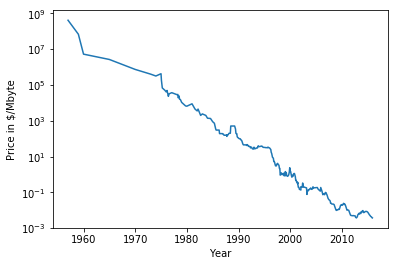

In [17]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel("Price in $/Mbyte")

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 過去のデータを用いて2000年以降の価格を予測する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date > 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

In [21]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

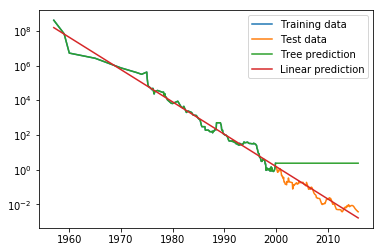

In [22]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()